## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## Helping functions

In [2]:
def plotall(loss_history, thetas_history):

    # number of thetas
    n_thetas = thetas_history.shape[1]

    # plot loss vs iterations
    plt.plot(loss_history, '-m.', markersize=12)
    plt.grid("True")
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.show()

    # plot loss vs thetas
    fig, axes = plt.subplots(nrows=n_thetas,
                             ncols=1,
                             figsize=(6, 6 * n_thetas))
    plt.suptitle("Loss vs thetas")
    for i in range(0, n_thetas):
        axes[i].grid()
        axes[i].plot(thetas_history[:, i], loss_history, '-m.', markersize=12)
        axes[i].set_title(f"Theta {i}")
        axes[i].set_xlabel(f"Theta{i}")
        axes[i].set_ylabel("loss")
    plt.show()

In [3]:
def minmaxscale(x):
    scaler = MinMaxScaler()
    return scaler.fit_transform(x)

In [4]:
def chunker(data, size):
    return (data[pos:pos + size, :] for pos in range(0, data.shape[0], size))

## The data

In [5]:
a1 = np.linspace(0, 20)
a2 = np.linspace(10, 100)
a3 = np.linspace(-7, -15)
x1 = np.column_stack((a1, a2, a3))
y1 = a1 + 2 * a2 + 3 * a3

In [6]:
data = np.genfromtxt('MultiVarLR.csv', delimiter=',')
x2 = data[:, :-1]
y2 = data[:, -1]

## momentum Gradiend descent

In [7]:
def momentum_gradient_descent(x,
                                y,
                                lr,
                                gamma,
                                max_epochs=500,
                                scale=False,
                                batch_size=5,
                                gra_threshold=.01,
                                conv_threshold=.01):
    # scale or not
    if scale == True:
        x = minmaxscale(x)

    # Concatinate data
    data = np.column_stack((x, y))

    # Shuffle data
    np.random.shuffle(data)

    # append column of ones
    data = np.column_stack((np.ones(x.shape[0]), data))

    # number of rows and columns and batches
    n, m = data.shape[0], (data.shape[1] - 1)
    n_batches = len(y) // batch_size

    # initializing thetas, loss history, thetas_history, vt_old
    thetas = np.zeros(m)
    loss_history = [np.inf]
    thetas_history = np.array(thetas)
    vt_old = np.zeros(m)
    
    for i in range(1, max_epochs + 1):
        print(f"****************** Epoch {i} ********************\n")
        for chunk in chunker(data, batch_size):
            x = chunk[:, :-1]
            y = chunk[:, -1]
            y_pred = x @ thetas
            error = y_pred - y
            j = .5 * (1 / batch_size) * (np.linalg.norm(error)**2)
            loss_history.append(j)
            gradient = (1 / batch_size) * x.T @ error
            gradient_norm = np.linalg.norm(gradient)
            vt_new = (gamma * vt_old) + (lr * gradient)
            vt_new_norm = np.linalg.norm(vt_new)
            thetas = thetas - vt_new
            vt_old = vt_new
            thetas_history = np.row_stack((thetas_history, thetas))
        convergence = np.abs(loss_history[-1] - loss_history[-(n_batches + 1)])
        print(f"Cost= {j}")
        print(f"Gradient vector: {gradient}")
        print(f"Gradient Vector Norm: {gradient_norm}")
        print(f"Momentum Vector Norm:{vt_new_norm}")
        print(f"Thetas: {thetas}")

        if gradient_norm < gra_threshold or convergence < conv_threshold:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs\n")
            print(f"thetas_Opt= {thetas}\n")
            print(f"Cost:{j}\n")
            break

    return thetas, loss_history[1:], thetas_history[:-1, :]

# Example 1

In [8]:
thetas, loss_history, thetas_history = momentum_gradient_descent(
    x1,
    y1,
    lr=.6,
    gamma=.5,
    max_epochs=500,
    batch_size=10,
    scale=True,
    gra_threshold=.01,
    conv_threshold=.01)

****************** Epoch 1 ********************

Cost= 252.45350730981846
Gradient vector: [-13.32749311  -9.81176894  -9.81176894  -3.51572417]
Gradient Vector Norm: 19.55822100032911
Momentum Vector Norm:10.844624380378553
Thetas: [ 19.68873261  48.70709147  48.70709147 -29.01835886]
****************** Epoch 2 ********************

Cost= 16.089477690675047
Gradient vector: [-5.26052128 -2.37344963 -2.37344963 -2.88707165]
Gradient Vector Norm: 6.875666735949466
Momentum Vector Norm:1.4768676826678313
Thetas: [ 30.32387945  66.6181175   66.6181175  -36.29423805]
****************** Epoch 3 ********************

Cost= 0.9175589100343619
Gradient vector: [-1.31739662 -0.52983852 -0.52983852 -0.7875581 ]
Gradient Vector Norm: 1.7079927711194764
Momentum Vector Norm:0.1736700985447159
Thetas: [ 33.72820689  69.4765434   69.4765434  -35.74833651]
****************** Epoch 4 ********************

Cost= 0.04345108337732858
Gradient vector: [-0.2572751  -0.12805979 -0.12805979 -0.12921531]
Grad

In [90]:
y_pred = np.column_stack((np.ones(x1.shape[0]), minmaxscale(x1))) @ thetas
print(f"r2_score: {r2_score(y1,y_pred)}")

r2_score: 0.9999999886848338


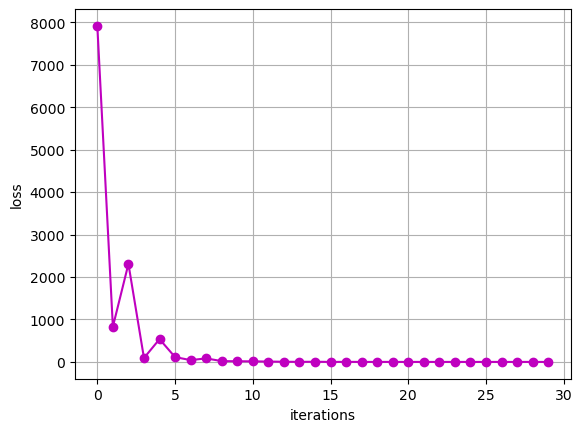

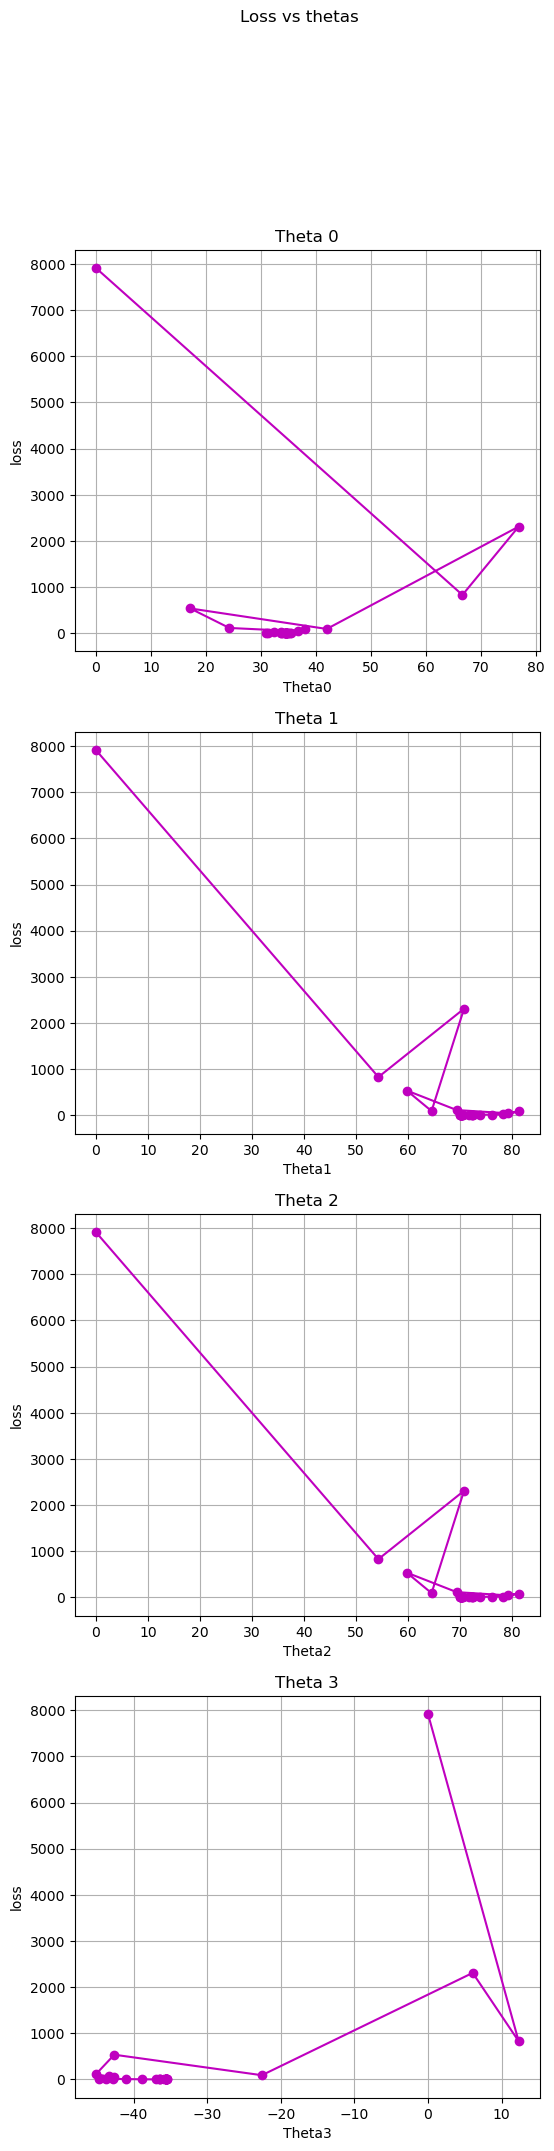

In [91]:
plotall(loss_history, thetas_history)

# Example 2

In [92]:
thetas, loss_history, thetas_history = momentum_gradient_descent(
    x2,
    y2,
    lr=.6,
    gamma=.5,
    max_epochs=500,
    batch_size=5,
    scale=True,
    gra_threshold=.001,
    conv_threshold=.001)

****************** Epoch 1 ********************

Cost= 1707.5865578644593
Gradient vector: [-58.1697079  -46.29255731 -44.12482214 -43.68309398]
Gradient Vector Norm: 96.8603551923869
Momentum Vector Norm:48.03124216675098
Thetas: [89.48189709 58.31981703 37.16663685 42.19771755]
****************** Epoch 2 ********************

Cost= 14.794038546647108
Gradient vector: [-3.5130009  -1.67834163 -1.72261948 -1.6154611 ]
Gradient Vector Norm: 4.553585224150349
Momentum Vector Norm:6.743706292348484
Thetas: [88.06139342 51.22985328 32.33026014 37.79307364]
****************** Epoch 3 ********************

Cost= 5.4908683495710715
Gradient vector: [0.98668814 1.53383274 1.38756242 1.43171819]
Gradient Vector Norm: 2.70209970149093
Momentum Vector Norm:2.0354287661181014
Thetas: [90.45112004 45.65462293 28.40578113 34.06102307]
****************** Epoch 4 ********************

Cost= 1.4665234731905996
Gradient vector: [-0.17141621  0.24932838  0.20811973  0.23359402]
Gradient Vector Norm: 0.43

In [93]:
y_pred2 = np.column_stack((np.ones(x2.shape[0]), minmaxscale(x2))) @ thetas
print(f"r2_score: {r2_score(y2,y_pred2)}")

r2_score: 0.9725330394946862


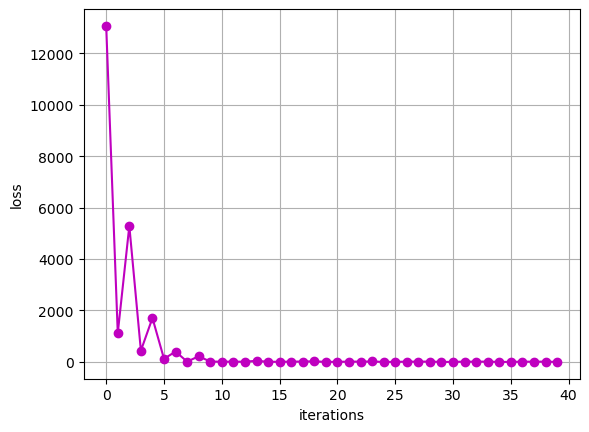

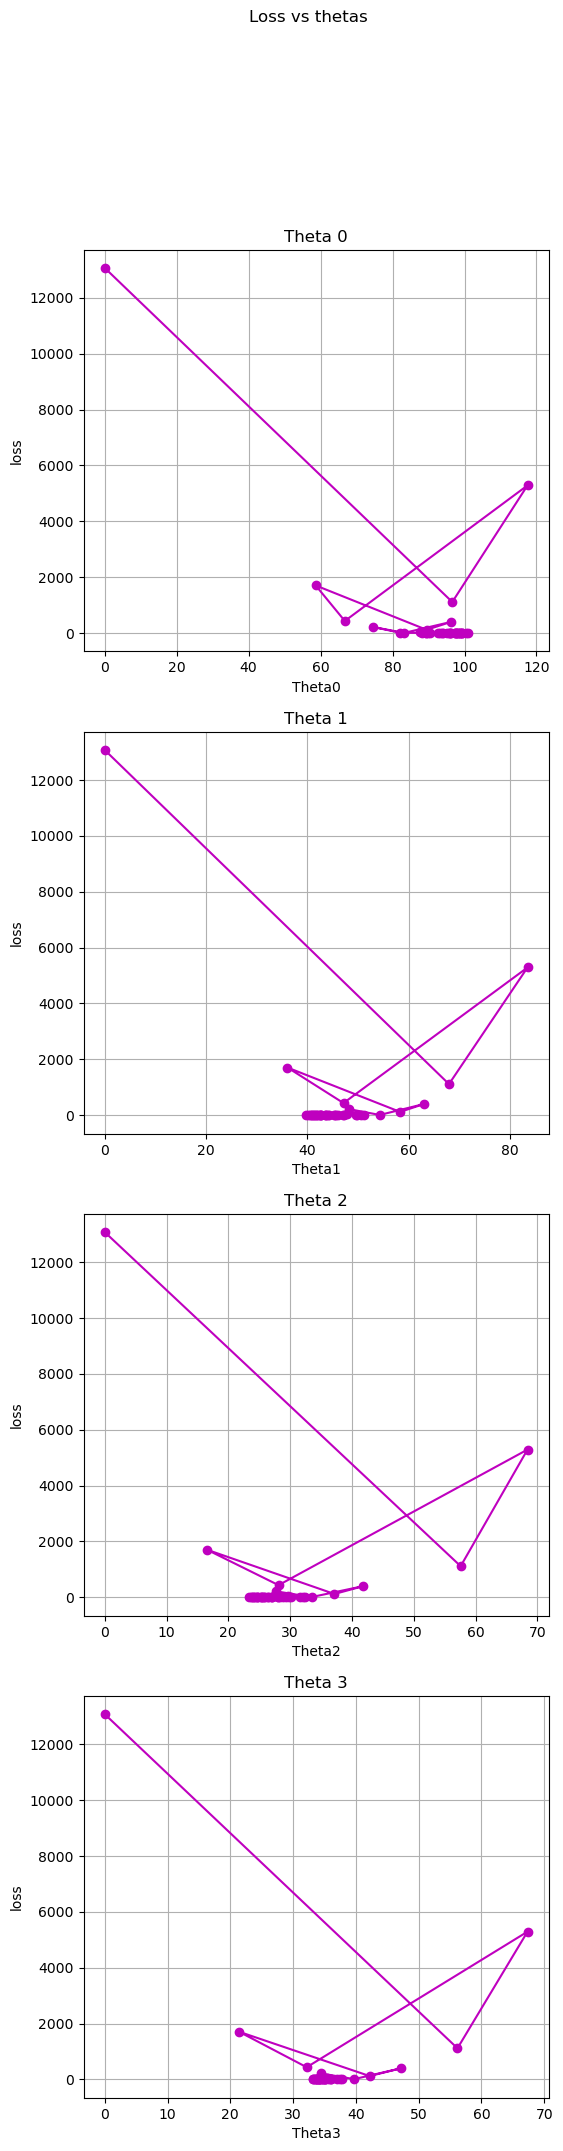

In [94]:
plotall(loss_history, thetas_history)

# Nesterov Accelerated Gradient

In [11]:
def Nag(x,
        y,
        lr,
        gamma,
        max_epochs=500,
        scale=False,
        batch_size=5,
        gra_threshold=.01,
        conv_threshold=.01):
    # scale or not
    if scale == True:
        x = minmaxscale(x)

    # Concatinate data
    data = np.column_stack((x, y))

    # Shuffle data
    np.random.shuffle(data)

    # append column of ones
    data = np.column_stack((np.ones(x.shape[0]), data))

    # number of rows and columns and batches
    n, m = data.shape[0], (data.shape[1] - 1)
    n_batches = len(y) // batch_size

    # initializing thetas, loss history, thetas_history, vt_old
    thetas = np.zeros(m)
    loss_history = [np.inf]
    thetas_history = np.array(thetas)
    vt_old = np.zeros(m)

    for i in range(1, max_epochs + 1):
        print(f"****************** Epoch {i} ********************\n")
        for chunk in chunker(data, batch_size):
            x = chunk[:, :-1]
            y = chunk[:, -1]
            thetas_temp = thetas - gamma * vt_old
            y_pred = x @ thetas_temp
            error = y_pred - y
            j = .5 * (1 / batch_size) * (np.linalg.norm(error)**2)
            loss_history.append(j)
            gradient_temp = (1 / batch_size) * x.T @ error
            gradient_norm = np.linalg.norm(gradient_temp)
            vt_new = (gamma * vt_old) + (lr * gradient_temp)
            vt_new_norm = np.linalg.norm(vt_new)
            thetas = thetas_temp - lr * gradient_temp
            vt_old = vt_new
            thetas_history = np.row_stack((thetas_history, thetas))
        convergence = np.abs(loss_history[-1] - loss_history[-(n_batches + 1)])
        print(f"Cost= {j}")
        print(f"Gradient vector: {gradient_temp}")
        print(f"Gradient Vector Norm: {gradient_norm}")
        print(f"Momentum Vector Norm:{vt_new_norm}")
        print(f"Thetas: {thetas}")

        if gradient_norm < gra_threshold or convergence < conv_threshold:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs\n")
            print(f"thetas_Opt= {thetas}\n")
            print(f"Cost:{j}\n")
            break

    return thetas, loss_history[1:], thetas_history[:-1, :]

# Example 3

In [12]:
thetas, loss_history, thetas_history = Nag(
    x1,
    y1,
    lr=.6,
    gamma=.5,
    max_epochs=500,
    batch_size=10,
    scale=True,
    gra_threshold=.01,
    conv_threshold=.01)

****************** Epoch 1 ********************

Cost= 101.72356399941522
Gradient vector: [ 5.24816705 -0.84035255 -0.84035255  6.0885196 ]
Gradient Vector Norm: 8.125620778770958
Momentum Vector Norm:11.39472515613215
Thetas: [ 39.44139236  56.17719126  56.17719126 -16.73579889]
****************** Epoch 2 ********************

Cost= 0.9433320899830981
Gradient vector: [0.69385581 0.03498622 0.03498622 0.65886959]
Gradient Vector Norm: 0.9581195581008847
Momentum Vector Norm:1.8914045845111744
Thetas: [ 35.03271906  68.92555289  68.92555289 -33.89283382]
****************** Epoch 3 ********************

Cost= 0.0003537020182602748
Gradient vector: [ 0.01031305  0.01135626  0.01135626 -0.0010432 ]
Gradient Vector Norm: 0.019114823413455228
Momentum Vector Norm:0.09401692169352109
Thetas: [ 34.59105076  70.22404206  70.22404206 -35.6329913 ]
****************** Epoch 4 ********************

Cost= 0.000223502521250913
Gradient vector: [-0.00815257  0.00102374  0.00102374 -0.00917631]
Gradi

In [13]:
y_pred = np.column_stack((np.ones(x1.shape[0]), minmaxscale(x1))) @ thetas
print(f"r2_score: {r2_score(y1,y_pred)}")

r2_score: 0.9999998457268737


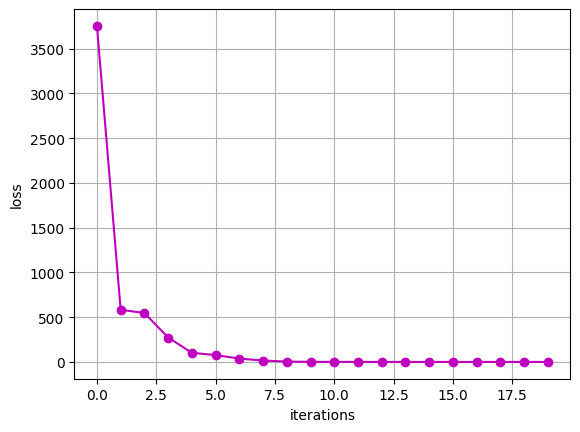

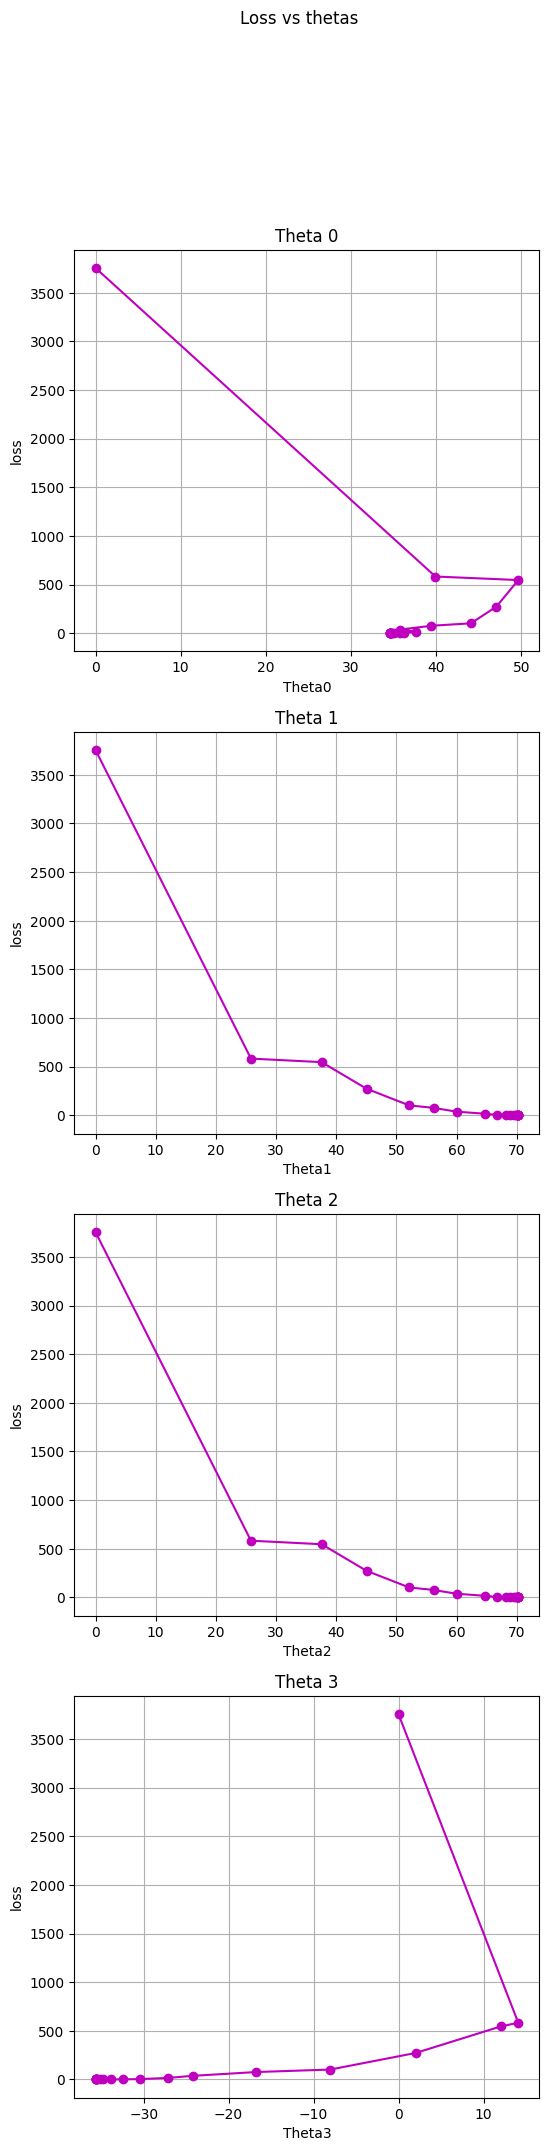

In [14]:
plotall(loss_history, thetas_history)

# Example 4

In [24]:
thetas, loss_history, thetas_history = Nag(
    x2,
    y2,
    lr=.5,
    gamma=.5,
    max_epochs=500,
    batch_size=5,
    scale=True,
    gra_threshold=.001,
    conv_threshold=.001)

****************** Epoch 1 ********************

Cost= 63.41007933493301
Gradient vector: [10.79735674  8.30253305  8.15276863  7.52506709]
Gradient Vector Norm: 17.567277498387845
Momentum Vector Norm:5.388492242481157
Thetas: [89.93975461 38.37669837 32.95608741 37.53512773]
****************** Epoch 2 ********************

Cost= 5.122630874569051
Gradient vector: [2.06294937 1.52378904 1.55171229 1.16968572]
Gradient Vector Norm: 3.217711742306269
Momentum Vector Norm:1.4705229983037422
Thetas: [95.92447476 36.41920744 30.90859805 36.92468056]
****************** Epoch 3 ********************

Cost= 4.685938624955811
Gradient vector: [1.84709102 1.31085969 1.36472826 0.97052136]
Gradient Vector Norm: 2.8168232645044506
Momentum Vector Norm:1.257095502079037
Thetas: [97.22885695 35.46345751 30.15202159 36.99558109]
****************** Epoch 4 ********************

Cost= 4.607952763807098
Gradient vector: [1.82607795 1.26629129 1.33355107 0.93159538]
Gradient Vector Norm: 2.75395764904826

In [25]:
y_pred2 = np.column_stack((np.ones(x2.shape[0]), minmaxscale(x2))) @ thetas
print(f"r2_score: {r2_score(y2,y_pred2)}")

r2_score: 0.9882726567411189


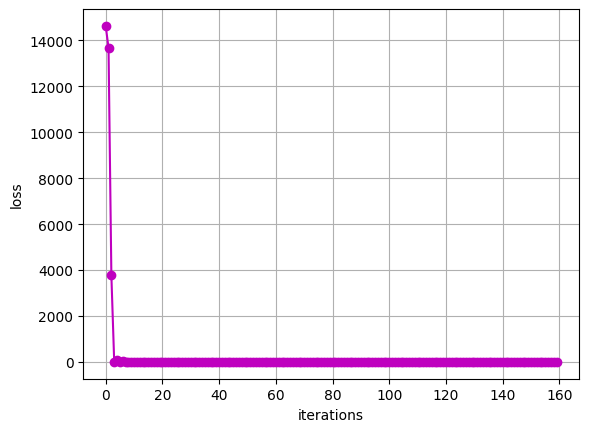

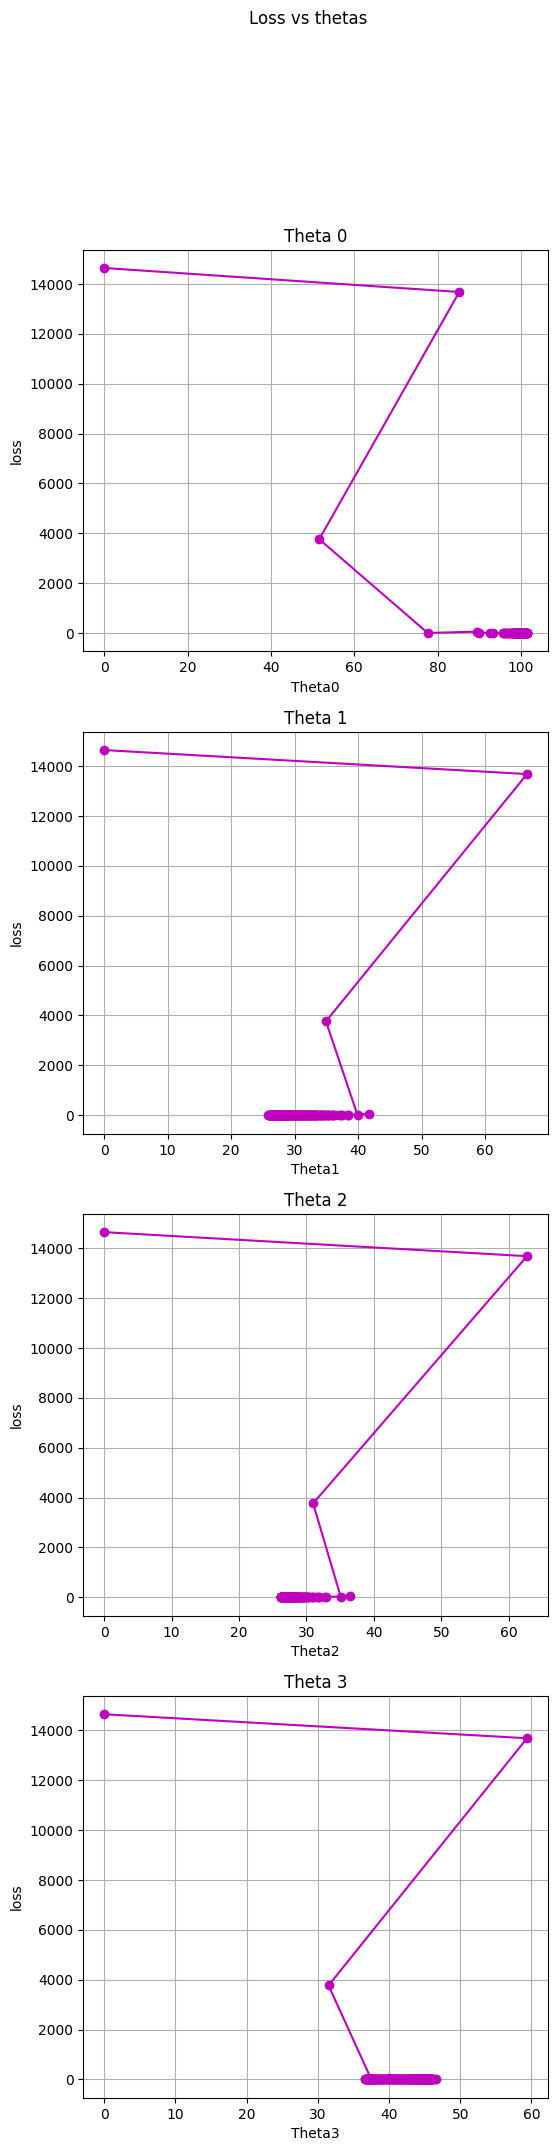

In [26]:
plotall(loss_history, thetas_history)